In [ ]:
# loading libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_trans = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx', 'Transactions')
df_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
def data_understanding(df):
  return 'Data Dimension', df.shape , 60*'x',df.info(),60*'x', 'checking for missing values',df.isnull().sum(),'checking the number of unique values',60*'x', df.nunique()

In [ ]:
data_understanding(df_trans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

('Data Dimension',
 (20000, 13),
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 None,
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 'checking for missing values',
 transaction_id               0
 product_id                   0
 customer_id                  0
 transaction_date             0
 online_order               360
 order_status                 0
 brand                      197
 product_line               197
 product_class              197
 product_size               197
 list_price                   0
 standard_cost              197
 product_first_sold_date    197
 dtype: int64,
 'checking the number of unique values',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 transaction_id             20000
 product_id                   101
 customer_id                 3494
 transaction_date             364
 online_order                   2
 order_status                   2
 brand                          6
 product_line          

In [ ]:
def drop_null_val(dataFrame, column_name ):#column should be in quotes
  return dataFrame.dropna(subset = [column_name], inplace=True) ,'New shape :',dataFrame.shape

In [ ]:
drop_null_val(df_trans, 'product_first_sold_date')

(None, 'New shape :', (19803, 13))

In [ ]:
customer = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerDemographic',skiprows=1, index_col= None )
customer.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,customer_id.1,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1.0,Laraine,Medendorp,F,93,1953-10-12,1,Health,Mass Customer,N,"""'",Yes,11.0
1,2.0,Eli,Bockman,Male,81,1980-12-16,2,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,4.0,Arlin,Dearle,Male,61,1954-01-20,3,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,5.0,Talbot,NaN,Male,33,1961-10-03,4,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,6.0,Sheila-kathryn,Calton,Female,56,1977-05-13,5,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
data_understanding(customer)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   float64       
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   customer_id.1                        4000 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

('Data Dimension',
 (4000, 13),
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 None,
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 'checking for missing values',
 customer_id                              1
 first_name                               0
 last_name                              125
 gender                                   0
 past_3_years_bike_related_purchases      0
 DOB                                     87
 customer_id.1                            0
 job_industry_category                  656
 wealth_segment                           0
 deceased_indicator                       0
 default                                302
 owns_car                                 0
 tenure                                  87
 dtype: int64,
 'checking the number of unique values',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 customer_id                            3999
 first_name                             3139
 last_name      

In [ ]:
customer.dropna(subset = ['tenure', 'DOB'], inplace = True)#dropping null values for the sensitive fields

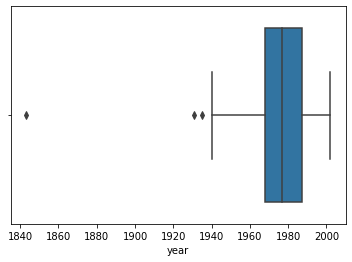

In [ ]:
customer['year']= customer.DOB.dt.year
sns.boxplot(x = customer.year) #checking for outliers

In [ ]:
#removing outliers that are below the year 1930
customer =customer[customer.year>= 1970] 

In [ ]:
custAdres = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerAddress', skiprows=1)
custAdres.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
data_understanding(custAdres)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


('Data Dimension',
 (3999, 6),
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 None,
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 'checking for missing values',
 customer_id           0
 address               0
 postcode              0
 state                 0
 country               0
 property_valuation    0
 dtype: int64,
 'checking the number of unique values',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
 customer_id           3999
 address               3996
 postcode               873
 state                    5
 country                  1
 property_valuation      12
 dtype: int64)

In [ ]:
cust_trans = pd.merge(df_trans, customer, how='inner', on = 'customer_id')
merged_df = pd.merge(custAdres, cust_trans , how ='inner', on='customer_id')
merged_df = merged_df.drop(['default'], 1)
merged_df.head()

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,customer_id.1,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year
0,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,2261,1,2017-05-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,40784.0,Eli,Bockman,Male,81,1980-12-16,2,Financial Services,Mass Customer,N,Yes,16.0,1980
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,6743,85,2017-06-11,0.0,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,38206.0,Eli,Bockman,Male,81,1980-12-16,2,Financial Services,Mass Customer,N,Yes,16.0,1980
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,16411,26,2017-08-24,0.0,Approved,WeareA2B,Standard,medium,medium,1992.93,762.63,37337.0,Eli,Bockman,Male,81,1980-12-16,2,Financial Services,Mass Customer,N,Yes,16.0,1980
3,6,9 Oakridge Court,3216,VIC,Australia,9,902,0,2017-05-21,0.0,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,33364.0,Sheila-kathryn,Calton,Female,56,1977-05-13,5,NaN,Affluent Customer,N,Yes,8.0,1977
4,6,9 Oakridge Court,3216,VIC,Australia,9,4013,0,2017-09-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,36361.0,Sheila-kathryn,Calton,Female,56,1977-05-13,5,NaN,Affluent Customer,N,Yes,8.0,1977


In [ ]:
merged_df.dropna(inplace = True)

##Feature engineering

In [ ]:
merged_df['month'] = merged_df.transaction_date.dt.strftime('%b')#to obtain monthly for the transaction dates

In [ ]:
#obtaining the ages of customers using 2017 as the reference year.
Ages=[]
for yr in merged_df.year:
  age = 2017-yr
  Ages.append(age)
merged_df['Age'] = Ages

In [ ]:
#calulating profit margins using standard cost and list price
margins = merged_df.list_price - merged_df.standard_cost
merged_df['profit_margin'] = margins

##Data Exploratory analysis

In [ ]:
merged_df.describe()

,customer_id,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,tenure,year,Age,profit_margin
count,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000
mean,1720.142664,2994.490694,7.482562,9996.470365,46.023581,0.498193,1107.374108,557.615002,38176.990332,49.516082,10.116191,1983.453650,33.546350,549.759106
std,1006.363576,842.789165,2.816512,5786.248362,30.604173,0.500019,582.158720,405.845577,2893.420994,28.585025,5.967811,8.745951,8.745951,491.912057
min,2.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000,0.000000,1.000000,1970.000000,15.000000,4.800000
25%,835.750000,2211.000000,6.000000,4962.500000,18.000000,0.000000,575.270000,215.140000,35560.000000,25.000000,5.000000,1976.000000,26.000000,133.780000
50%,1684.000000,2770.000000,8.000000,9969.000000,45.000000,0.000000,1163.890000,507.580000,38206.000000,49.000000,10.000000,1981.000000,36.000000,445.210000
75%,2595.000000,3677.000000,10.000000,15026.750000,73.000000,1.000000,1635.300000,795.100000,40779.000000,74.000000,15.000000,1991.000000,41.000000,830.240000
max,3500.000000,4883.000000,12.000000,19999.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000,99.000000,22.000000,2002.000000,47.000000,1702.550000


In [ ]:
merged_df.gender = merged_df.gender.replace({'F':'Female', 'Femal':'Female', 'M': 'Male'}) 
merged_df.state = merged_df.state.replace({'NSW':'New South Wales', 'VIC':'Victoria'})# correcting to have consistency

In [ ]:
merged_df.to_csv('kpmg_dataset.csv')

##Data exploration

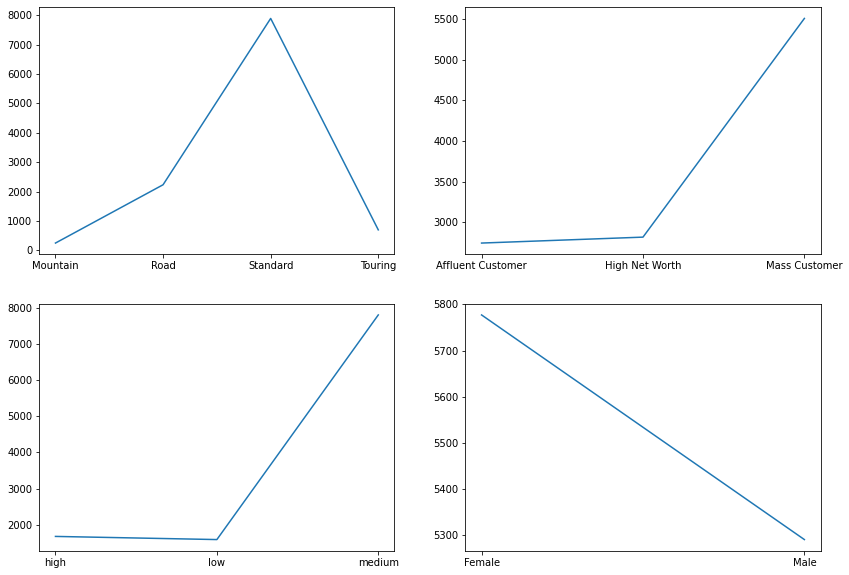

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (14,10))
ax[0,0].plot(merged_df.groupby(['product_line']).count()['customer_id'])
ax[0,1].plot(merged_df.groupby(['wealth_segment']).count()['customer_id'])
ax[1,0].plot(merged_df.groupby(['product_class']).count()['customer_id'])
ax[1,1].plot(merged_df.groupby(['gender']).count()['customer_id'])
plt.show()


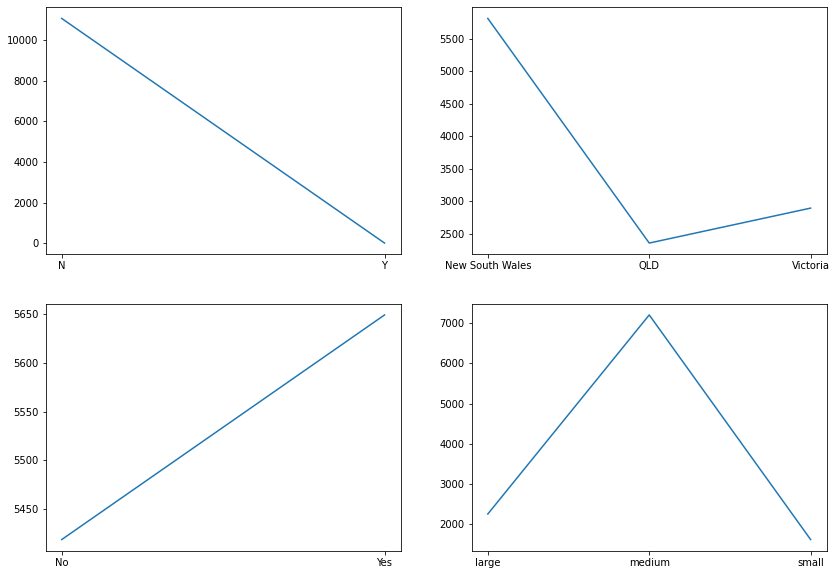

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (14,10))
ax[0,0].plot(merged_df.groupby(['deceased_indicator']).count()['customer_id'])
ax[0,1].plot(merged_df.groupby(['state']).count()['customer_id'])
ax[1,0].plot(merged_df.groupby(['owns_car']).count()['customer_id'])
ax[1,1].plot(merged_df.groupby(['product_size']).count()['customer_id'])
plt.show()

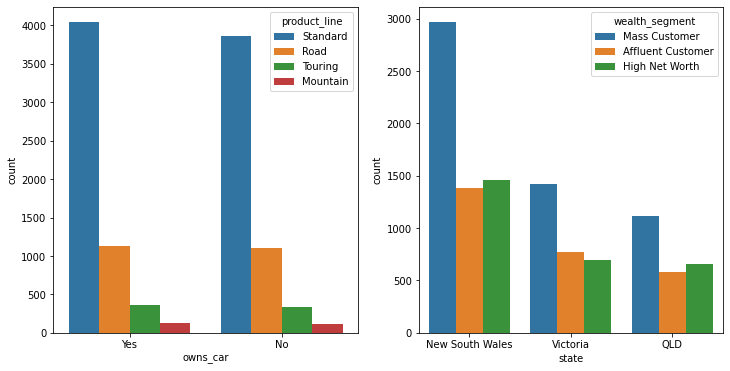

In [ ]:
fig, axes= plt.subplots(1,2,figsize=(12, 6) )
sns.countplot(x ='owns_car', data = merged_df, hue = 'product_line', ax = axes[0])
sns.countplot(x ='state', data = merged_df, hue = 'wealth_segment', ax = axes[1])
# # ax[0,0].plt.xticks(rotation = 45)

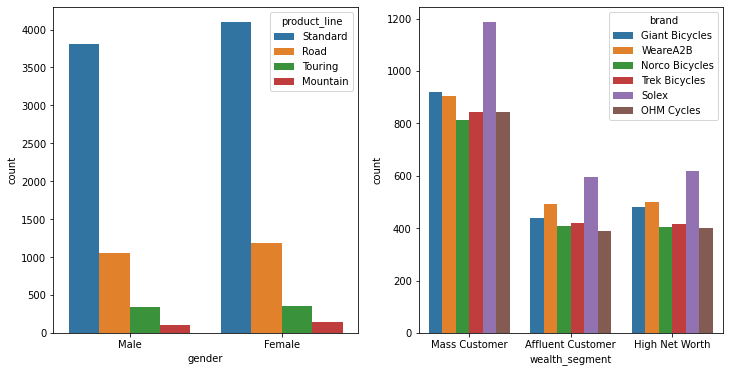

In [ ]:
fig, axes= plt.subplots(1,2,figsize=(12, 6) )
sns.countplot(x ='gender', data = merged_df, hue = 'product_line', ax = axes[0])
sns.countplot(x ='wealth_segment', data = merged_df, hue = 'brand', ax = axes[1])
# ax[0,1].plt.legend(loc = 'upper right')
# plt.xticks(rotation = 45)

In [ ]:
# sns.lineplot(x="transaction_date", y= 'transaction_id', data=merged_df)
# plt.xticks(rotation=15)
# plt.title('transcations against transaction date')
# plt.show()

In [ ]:
num_df = merged_df.select_dtypes(include = [int, float])
num_df = pd.DataFrame(num_df, columns = ['property_valuation',	'list_price',	'standard_cost','past_3_years_bike_related_purchases','postcode','tenure','online_order','transaction_id',	'product_id','Age','profit_margin','product_first_sold_date'])
num_df.describe()

,property_valuation,list_price,standard_cost,past_3_years_bike_related_purchases,postcode,tenure,online_order,transaction_id,product_id,Age,profit_margin,product_first_sold_date
count,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000
mean,7.482562,1107.374108,557.615002,49.516082,2994.490694,10.116191,0.498193,9996.470365,46.023581,33.546350,549.759106,38176.990332
std,2.816512,582.158720,405.845577,28.585025,842.789165,5.967811,0.500019,5786.248362,30.604173,8.745951,491.912057,2893.420994
min,1.000000,12.010000,7.210000,0.000000,2000.000000,1.000000,0.000000,1.000000,0.000000,15.000000,4.800000,33259.000000
25%,6.000000,575.270000,215.140000,25.000000,2211.000000,5.000000,0.000000,4962.500000,18.000000,26.000000,133.780000,35560.000000
50%,8.000000,1163.890000,507.580000,49.000000,2770.000000,10.000000,0.000000,9969.000000,45.000000,36.000000,445.210000,38206.000000
75%,10.000000,1635.300000,795.100000,74.000000,3677.000000,15.000000,1.000000,15026.750000,73.000000,41.000000,830.240000,40779.000000
max,12.000000,2091.470000,1759.850000,99.000000,4883.000000,22.000000,1.000000,19999.000000,100.000000,47.000000,1702.550000,42710.000000


In [ ]:
cat_df = merged_df.select_dtypes(include = 'object')
cat_df.describe()

,customer_id,address,state,country,order_status,brand,product_line,product_class,product_size,first_name,last_name,gender,job_industry_category,wealth_segment,deceased_indicator,owns_car,month
count,10997,10997,10997,10997,10997,10997,10997,10997,10997,10997,10997,10997,10997,10997,10997,10997,10997
unique,1982,1982,3,1,2,6,4,3,3,1752,1942,2,9,3,2,2,12
top,1068,8142 Tomscot Drive,New South Wales,Australia,Approved,Solex,Standard,medium,medium,Tobe,Elgey,Female,Financial Services,Mass Customer,N,Yes,Oct
freq,14,14,5938,10997,10895,2389,7866,7665,7209,31,18,5643,2662,5493,10989,5540,989


## Multivaliarte Analysis
### correlation analysis

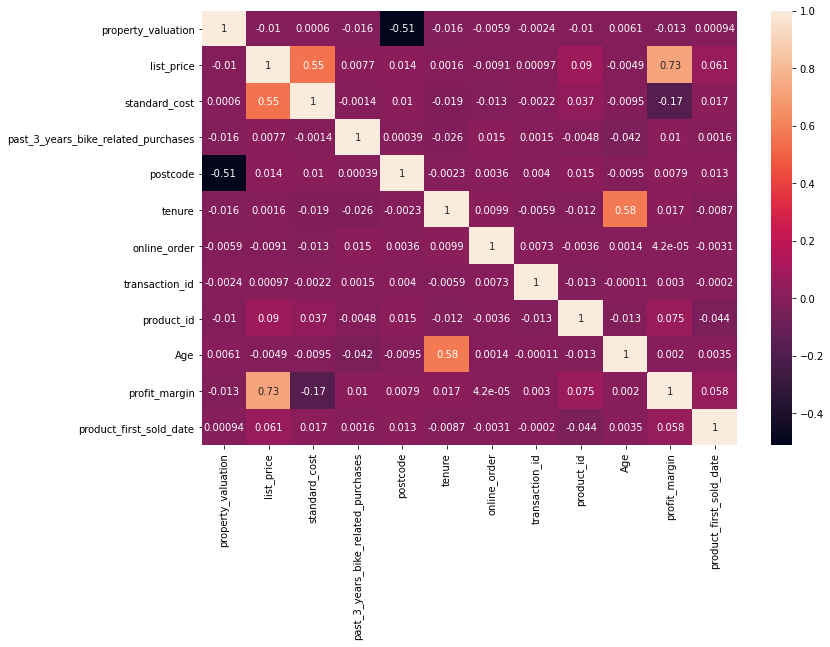

In [ ]:
num_cor  = num_df.corr()
plt.figure(figsize =(12,8))
sns.heatmap(num_cor, annot= True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_encod = cat_df[['customer_id', 'address', 'state', 'country', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'first_name',
       'last_name', 'gender', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'month']].apply(le.fit_transform)

In [ ]:
cat_cor = cat_encod.corr()
plt.figure(figsize =(12,8))
sns.heatmap(cat_cor, annot = True)

NameError: ignored

In [ ]:
comb_cor = pd.concat([num_df, cat_encod], axis =1)
comb_cor = comb_cor.corr()
plt.figure(figsize =(13,9))
sns.heatmap(comb_cor, vmin = 0.25,annot =True)

NameError: ignored

##Hypothesis

**null hypothesis:** customers aged between 30 - 40 are profitable = other age groups

**alternate hypothesis:** customers aged between 30 -40 > profitable other age groups

### hypothesis parameters

* one-tail test
* sample_1.mean = 556.86
* sample_2.mean = 546.31
* confidence level = 95%
* sample_size_1 (n) = 451
* sample_size_2 (n) = 649

In [ ]:
#getting sample of Ages between 30-35
sample_30_35 = num_df[num_df.Age >= 30]
sample_1 = sample_30_35[sample_30_35.Age <= 40]
# sample_1.sample(152).profit_margin.mean()
n_1 = round(len(sample_1)*.1)
s_1 = sample_1.sample(n_1).profit_margin.std()
p_margin_mean_1 = sample_1.profit_margin.mean()
print('sample size is {}, profit_margin sample mean : {}.'.format(n_1, p_margin_mean_1 ))
print('standard deviation: {}'.format(round(s_1, 2)))

sample size is 450, profit_margin sample mean : 540.9993179293476.
standard deviation: 498.34


In [ ]:
#getting samples for ages less than 30 and more than 35 years
sample_2= pd.concat([num_df[num_df.Age >40], num_df[num_df.Age <30]], axis = 0)
n_2 = round(len(sample_2)*.1)
s_2 = sample_2.sample(n_2).profit_margin.std()
p_margin_mean_2 = sample_2.profit_margin.mean()           
print('sample size is {}, profit_margin sample mean : {}.'.format(n_2, p_margin_mean_2))
print('standard deviation: {}'.format(round(s_2, 2)))

sample size is 657, profit_margin sample mean : 555.7630363940842.
standard deviation: 500.67


In [ ]:
import math
import scipy.stats as stats
from scipy.stats import norm
def two_sample_t_test(n):
  diff_mean = p_margin_mean_1 - p_margin_mean_2-0
  df = math.sqrt((s_1**2+s_2**2)/(n_1+n_2-2))
  t_score = diff_mean/df
  prob = stats.t.cdf(t_score, df=df)
  alpha = n
  if prob < n:
    print('reject the null hypothesis')
  else:
    print('we fail to reject the null hypothesis')
  return t_score ,df, prob

In [ ]:
two_sample_t_test(0.05)

we fail to reject the null hypothesis


(-0.694742161428467, 21.250644173344472, 0.2473717820384435)

The above results suggest that there is no financial advantage in selling to customers of ages of 30- 40 years old

In [ ]:
num_df = merged_df[['property_valuation',	'list_price',	'standard_cost','past_3_years_bike_related_purchases','tenure','Age','profit_margin']]
new_df = pd.DataFrame(num_df, columns = ['property_valuation',	'list_price',	'standard_cost','past_3_years_bike_related_purchases','tenure','Age','profit_margin'])

#modeling

In [ ]:
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
from sklearn.preprocessing import StandardScaler

In [ ]:
new_df.dropna(inplace= True)
new_df.describe()

,property_valuation,list_price,standard_cost,past_3_years_bike_related_purchases,tenure,Age,profit_margin
count,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000
mean,7.482562,1107.374108,557.615002,49.516082,10.116191,33.546350,549.759106
std,2.816512,582.158720,405.845577,28.585025,5.967811,8.745951,491.912057
min,1.000000,12.010000,7.210000,0.000000,1.000000,15.000000,4.800000
25%,6.000000,575.270000,215.140000,25.000000,5.000000,26.000000,133.780000
50%,8.000000,1163.890000,507.580000,49.000000,10.000000,36.000000,445.210000
75%,10.000000,1635.300000,795.100000,74.000000,15.000000,41.000000,830.240000
max,12.000000,2091.470000,1759.850000,99.000000,22.000000,47.000000,1702.550000


In [ ]:
sc = StandardScaler()
num_scaled= sc.fit_transform(new_df)

In [ ]:
def elebow_curve(num_df):
  cluster_range = list(np.arange(2,15))
  inertias = []
  for n in cluster_range:
    k = KMeans(n_clusters = n, random_state = 0).fit(num_df)
    inertias.append(k.inertia_)
  plt.plot(cluster_range, inertias, marker = 'o')
  plt.title('cluster vs inertia')
  plt.show()

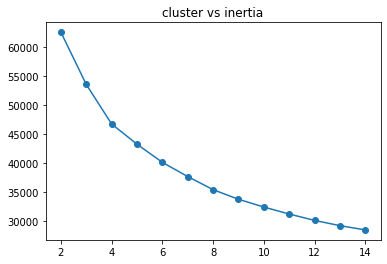

In [ ]:
elebow_curve(num_scaled)

In [ ]:
#using silhoutte score
from sklearn.metrics import silhouette_samples, silhouette_score

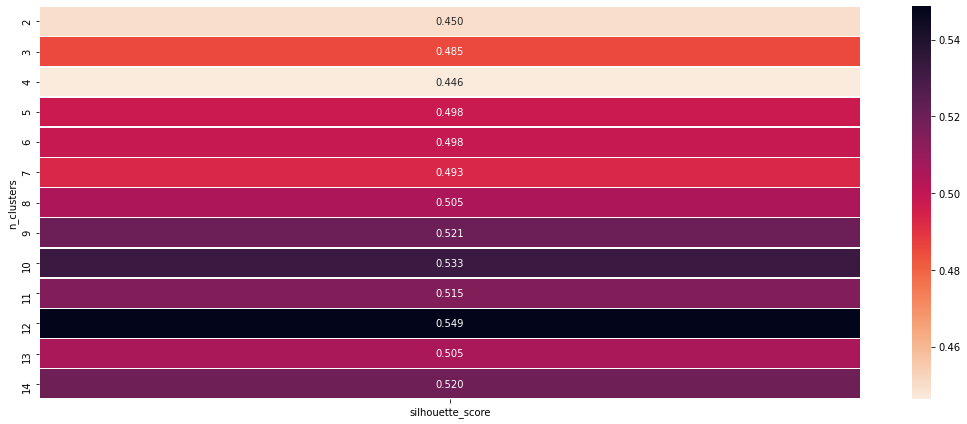

In [ ]:
cluster_range = np.arange(2,15)

results = []
for n in  cluster_range:
  clusterer = KMeans(n_clusters = n , random_state = 10)
  cluster_lables = clusterer.fit_predict(num_df)
  silhouette_avg = silhouette_score(num_df, cluster_lables)
  results.append([n, silhouette_avg])
result = pd.DataFrame(results, columns=["n_clusters","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters",values="silhouette_score")
plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [ ]:
kmeans = KMeans(n_clusters = 9).fit(num_df)
labels = kmeans.predict(num_df)
# cluster =pd.DataFrame(labels, columns = ['clusters'])
new_df['cluster'] = labels
# num_df.head()
new_df.groupby(['cluster']).mean()

,property_valuation,list_price,standard_cost,past_3_years_bike_related_purchases,tenure,Age,profit_margin
cluster,,,,,,,
0,7.485697,210.269631,135.561007,49.818236,10.224076,33.679976,74.708623
1,7.547101,1736.847993,862.550725,50.089130,10.260870,33.473188,874.297268
2,7.498278,1300.318450,1079.474834,50.176808,9.905855,33.708381,220.843617
3,7.489610,1155.537513,708.847591,50.272078,10.191558,33.575974,446.689922
4,7.481645,1353.115198,133.809530,48.367107,9.775330,33.531571,1219.305668
5,7.415825,1909.229318,377.126818,49.577441,10.219697,33.531987,1532.102500
6,7.489923,602.559280,445.104894,48.718810,9.918426,33.353647,157.454386
7,7.509434,1777.268836,1581.768302,47.163522,10.191824,33.498428,195.500535
8,7.411881,1008.828139,246.821198,50.337624,10.274257,33.694059,762.006941


In [ ]:
merged_df['clusters']= labels
merged_df.to_excel('kpmg_clustered.xlsx')

<Figure size 936x648 with 0 Axes>

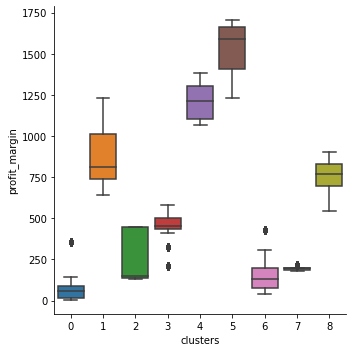

In [51]:
plt.figure(figsize= (13,9))
sns.catplot(x = 'clusters', y = 'profit_margin', data = merged_df, kind="box")